In [1]:
import os
os.getcwd()

'D:\\DATA_SCIENCE_NIT'

In [2]:
os.chdir("D:\DATA_SCIENCE_NIT")

In [3]:
os.getcwd()

'D:\\DATA_SCIENCE_NIT'

In [4]:
import pandas as pd

In [5]:
#Simple linear regression ----- (to calculate b0+b1X values)
#example
df=pd.DataFrame({"X":[1,2,3,4,5], "Y":[6,7,8,9,10]})
df

,X,Y
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [6]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df[['X']],df['Y'])

LinearRegression()

In [7]:
#b0
model.intercept_

4.999999999999999

In [8]:
#b1
model.coef_

array([1.])

In [9]:
#y^=b0+b1X
model.predict(df[['X']])

array([ 6.,  7.,  8.,  9., 10.])

In [10]:
#EXAMPLE
df=pd.DataFrame({"X":[1,2,3,4,5], "Y":[6,4,5,5,10]})
df

,X,Y
0,1,6
1,2,4
2,3,5
3,4,5
4,5,10


In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df[['X']],df['Y'])

LinearRegression()

In [12]:
#b0
model.intercept_

3.3

In [13]:
#b1
model.coef_

array([0.9])

In [14]:
#saving y^=b0+b1X in ypred
ypred=model.predict(df[['X']])
ypred

array([4.2, 5.1, 6. , 6.9, 7.8])

In [15]:
#Mean Square Error-----sum of (y-y^)^2/n
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['Y'],ypred)
mse

2.78

In [16]:
#RMSE
import numpy as np
np.sqrt(mse)

1.6673332000533065

In [17]:
#to check accuracy
model.score(df[["X"]],df["Y"])

0.3681818181818183

In [18]:
model.predict([[6]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.7])

# PROJECT-1

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# step-2 Data understanding
# 2.1: Data collection

In [20]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [21]:
df["total_spend"]=df["TV"]+df["radio"]+df["newspaper"]
df

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000
...,...,...,...,...,...
195,38200,3700,13800,7600,55700
196,94200,4900,8100,9700,107200
197,177000,9300,6400,12800,192700
198,283600,42000,66200,25500,391800


In [22]:
df.drop(columns=["TV","radio","newspaper"],inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


# Step-3 Data preprocessing
# 3.1 - EDA-Exploratory Data Analysis

In [23]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


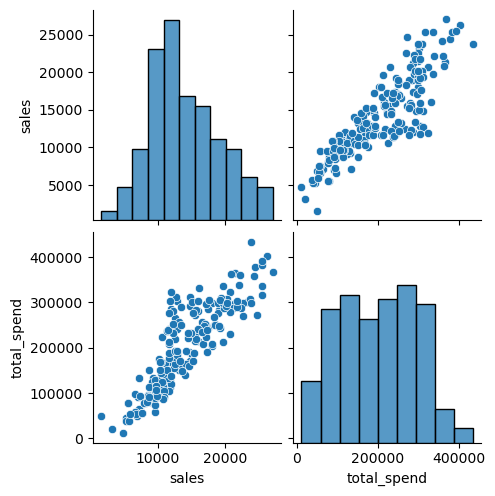

In [24]:
#applying scatter plot
sns.pairplot(df)
plt.show()

In [25]:
#to check the relation between sales and total spent
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


# Step-3.2 : Data cleaning

# Step 3.3 :Data Wrangling

In [26]:
#no encoding is required here

# Step 3.4: Train-Test Split

In [27]:
#checking X and y values
X=df.drop(columns=['sales'])
y=df['sales']

In [28]:
X

,total_spend
0,337100
1,128900
2,132400
3,251300
4,250000
...,...
195,55700
196,107200
197,192700
198,391800


In [29]:
y

0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64

In [30]:
#splitting X and y values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
X_train

,total_spend
169,301300
97,227900
31,168900
12,124800
35,303300
...,...
106,65700
14,283000
92,310200
179,193200


In [32]:
X_test

,total_spend
95,247800
15,296000
30,364400
158,93800
128,272500
115,162800
69,287900
170,80000
174,238900
45,229100


In [33]:
len(X_test)

60

In [34]:
y_train

169    15000
97     15500
31     11900
12      9200
35     12800
       ...  
106     7200
14     19000
92     19400
179    12600
102    14800
Name: sales, Length: 140, dtype: int64

In [35]:
y_test

95     16900
15     22400
30     21400
158     7300
128    24700
115    12600
69     22300
170     8400
174    11500
45     14900
66      9500
182     8700
165    11900
78      5300
186    10300
177    11700
56      5500
152    16600
82     11300
68     18900
124    19700
16     12500
148    10900
93     22200
65      9300
60      8100
84     21700
67     13400
125    10600
132     5700
9      10600
18     11300
55     23700
75      8700
150    16100
104    20700
135    11600
137    20800
164    11900
76      6900
79     11000
197    12800
38     10100
24      9700
122    11600
195     7600
29     10500
19     14600
143    10400
86     12000
114    14600
173    11700
5       7200
126     6600
117     9400
73     11000
140    10900
98     25400
172     7600
96     11700
Name: sales, dtype: int64

In [36]:
len(y_test)

60

# Step-4 : Modelling

# modelling with default paramaters

In [37]:
#import
from sklearn.linear_model import LinearRegression

In [38]:
#save the model
model=LinearRegression()

In [39]:
#fit
model.fit(X_train,y_train)

LinearRegression()

In [40]:
#print intercept(b0)
model.intercept_

4199.10650086872

In [41]:
#print coef(b1)
model.coef_

array([0.04895385])

In [42]:
#predictions
ypred_train=model.predict(X_train)
ypred_train
ypred_test=model.predict(X_test)
ypred_test

array([16329.87002336, 18689.44549464, 22037.88869456,  8790.97743876,
       17539.03006777, 12168.79294745, 18292.91932623,  8115.41433702,
       15894.18077659, 15414.43306666,  7053.11583647,  8683.27897327,
       19996.51323496,  6387.34350432, 12433.14372639, 14636.06688422,
        7958.76202358, 15708.15615437, 10470.09442351, 17705.47315081,
       20647.59941272, 14890.62689357,  8614.74358613, 21807.80560918,
        8076.25125866,  7963.65740837, 18410.40856132, 12227.53756499,
       10313.44211007,  6044.66656866, 15145.18690292,  9486.12207968,
       19291.57782445, 11542.18369366, 20432.20248173, 17798.48546192,
        9280.51591828, 21935.08561386, 10920.46982467,  6637.00812888,
       11385.53138021, 13632.51300121,  9334.36515103,  8761.60512999,
       16045.93770524,  6925.83583179, 10435.82672995, 13515.02376612,
       11282.72829952, 10063.77748551, 12007.2452492 , 13417.11607022,
       10690.3867393 ,  8962.31590659,  8702.86051245, 12345.02680007,
      

# Step-5 : Evaluation

In [43]:
#MAE
from sklearn.metrics import mean_absolute_error
print("MAE for test data:",mean_absolute_error(y_test,ypred_test))
print("MAE for train data:",mean_absolute_error(y_train,ypred_train))

MAE for test data: 1914.362736813055
MAE for train data: 1963.9767578200754


In [44]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE for test data:",mean_squared_error(y_test,ypred_test))
print("MSE for train data:",mean_squared_error(y_train,ypred_train))

MSE for test data: 6415866.312543217
MSE for train data: 6811655.464246886


In [45]:
#RMSE
print("RMSE for test data:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("RMSE for train data:",np.sqrt(mean_squared_error(y_train,ypred_train)))

RMSE for test data: 2532.956042362997
RMSE for train data: 2609.9148385046756


In [46]:
#R2
from sklearn.metrics import r2_score
print("R2 for test data:",r2_score(y_test,ypred_test))
print("R2 for train data:",r2_score(y_train,ypred_train))

R2 for test data: 0.7650262463310723
R2 for train data: 0.7404192834391545


In [47]:
#test R2
model.score(X_test,y_test)

0.7650262463310723

In [48]:
#train R2
model.score(X_train,y_train)

0.7404192834391545

In [49]:
#cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)

#to find which cv score is best
cv_score=scores.mean()
print("cross validation score:",cv_score)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
cross validation score: 0.7433783178555419


# check assumptions(only for linear regression)

# 1.linearity of errors

In [50]:
test_res=y_test - ypred_test      #test_predictions = y_pred

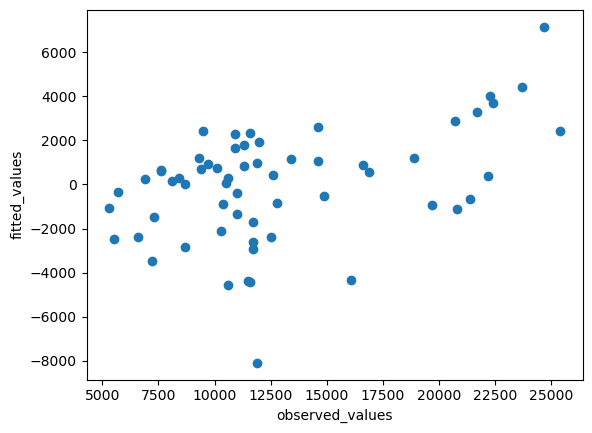

In [51]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")   #y_test
plt.ylabel("fitted_values")     #test_res
plt.show()

# 2. normality of errors

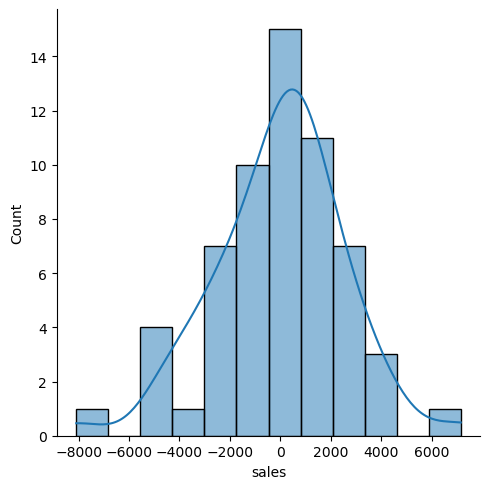

In [52]:
sns.displot(test_res,kde=True)
plt.show()

# 3.Equal variance of errors

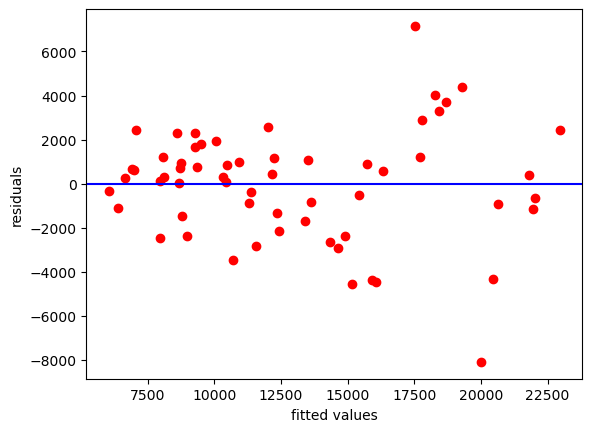

In [53]:
plt.scatter(ypred_test,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

# 4.variables significance

In [54]:
import statsmodels.formula.api as smf
model2=smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.06e-62
Time:                        15:13:30   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# step 6: Final inferences

In [55]:
#use the model to make predictions on a new value
model.predict([[321400]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19932.87323262])

# save a model

In [56]:
from joblib import dump
dump(model,'sales_model.joblib')

['sales_model.joblib']

# load a model

In [57]:
from joblib import load
loaded_model=load('sales_model.joblib')
loaded_model.predict([[200000]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])